In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/2/.ipynb_checkpoints


3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 32 classes.


In [ ]:
# Assuming you have already created the 'data' dataset
class_names = data.class_names
print("Classes:", class_names)


Classes: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '4', '5', '6', '7', '8', '9']


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

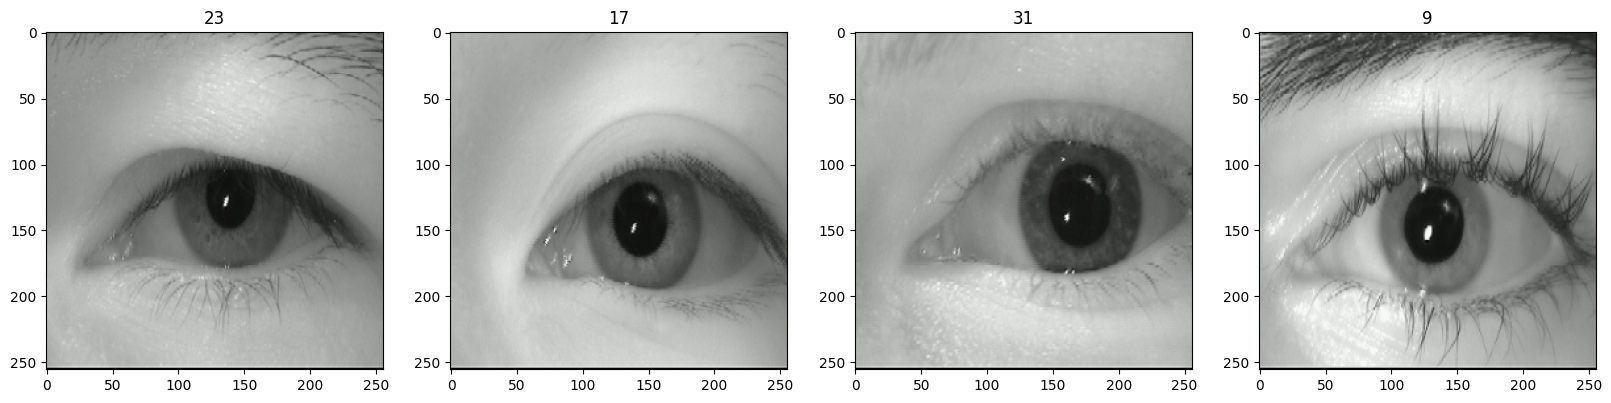

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.5647059 , 0.5901961 , 0.56078434],
          [0.5882353 , 0.58431375, 0.5686275 ],
          [0.627451  , 0.65294117, 0.64705884],
          ...,
          [0.64705884, 0.65294117, 0.627451  ],
          [0.627451  , 0.6431373 , 0.627451  ],
          [0.627451  , 0.62941176, 0.627451  ]],
 
         [[0.5647059 , 0.5813113 , 0.5643382 ],
          [0.5882353 , 0.6020833 , 0.58639705],
          [0.6452206 , 0.65294117, 0.6292892 ],
          ...,
          [0.64705884, 0.64938724, 0.627451  ],
          [0.627451  , 0.64846814, 0.6452206 ],
          [0.627451  , 0.62941176, 0.6310049 ]],
 
         [[0.5448529 , 0.5588848 , 0.5448529 ],
          [0.6047794 , 0.61219364, 0.5948529 ],
          [0.64705884, 0.65294117, 0.6340686 ],
          ...,
          [0.66360295, 0.66887254, 0.6439951 ],
          [0.6439951 , 0.6606005 , 0.64705884],
          [0.65392154, 0.6443015 , 0.6313726 ]],
 
         ...,
 
         [[0.83688724, 0.8501226 , 0.83688724],
          [0.81372

5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) +1

In [ ]:
test_size

1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)       

7. Train


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 3s 249ms/step - loss: 3.7198 - accuracy: 0.0521 - val_loss: 3.5000 - val_accuracy: 0.0625
Epoch 2/20
3/3 [==============================] - 1s 192ms/step - loss: 3.4767 - accuracy: 0.0417 - val_loss: 3.4508 - val_accuracy: 0.0625
Epoch 3/20
3/3 [==============================] - 1s 166ms/step - loss: 3.4994 - accuracy: 0.0208 - val_loss: 3.4529 - val_accuracy: 0.1250
Epoch 4/20
3/3 [==============================] - 1s 163ms/step - loss: 3.4262 - accuracy: 0.1771 - val_loss: 3.3925 - val_accuracy: 0.2188
Epoch 5/20
3/3 [==============================] - 1s 219ms/step - loss: 3.3710 - accuracy: 0.1875 - val_loss: 3.2574 - val_accuracy: 0.1875
Epoch 6/20
3/3 [==============================] - 1s 161ms/step - loss: 3.2433 - accuracy: 0.2396 - val_loss: 2.8330 - val_accuracy: 0.1875
Epoch 7/20
3/3 [==============================] - 1s 174ms/step - loss: 2.7921 - accuracy: 0.3021 - val_loss: 2.4062 - val_accuracy: 0.4688
Epoch 8/20
3/3 [====

8. Plot Performance

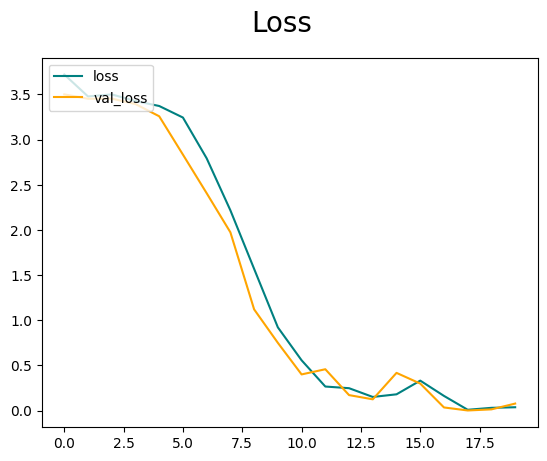

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

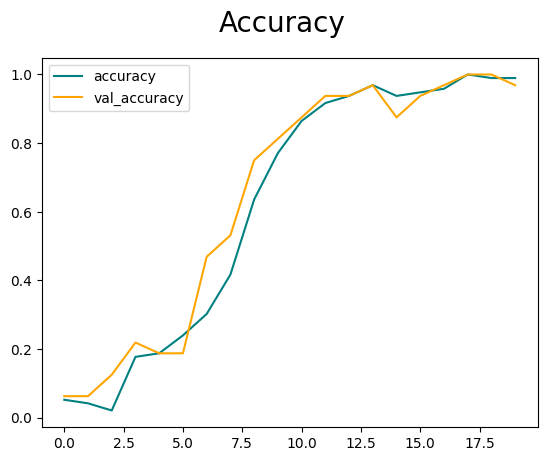

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision(top_k=1)
re = Recall(top_k=1)
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    y = tf.convert_to_tensor(y, dtype=tf.float32)  # Convert y to the appropriate data type
    yhat = tf.convert_to_tensor(yhat, dtype=tf.float32)  # Convert yhat to the appropriate data type

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


10. Test

In [ ]:
import cv2

TypeError: ignored

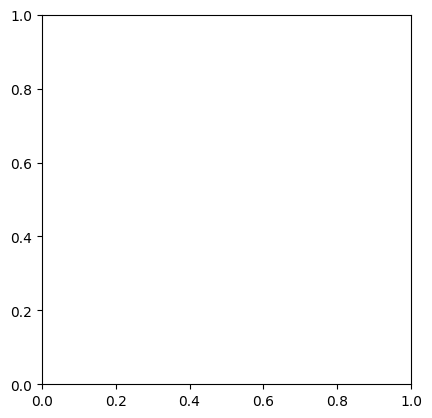

In [ ]:
img = cv2.imread('/content/hockl1.bmp')
plt.imshow(img)
plt.show()

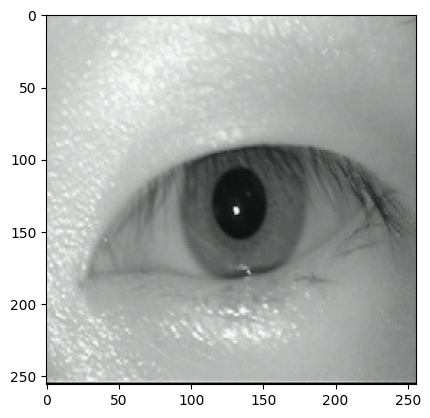

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [ ]:
np.argmax(yhat[0])

1

In [ ]:
if np.argmax(yhat[0])==0:
    user_id='user1'
elif np.argmax(yhat[0])==1:
    user_id='user2'
elif np.argmax(yhat[0])==2:
    user_id=='user3'

In [ ]:
print(user_id)

user2


Code for ATM Window

In [ ]:
# Dummy user account data (for demonstration purposes)
user_accounts = {
    "user1": {
        "name": "John Doe",
        "account_number": "123456789",
        "balance": 5000.00,
    },
    "user2": {
        "name": "Jane Smith",
        "account_number": "987654321",
        "balance": 7500.00,
    }
}

def authenticate_iris(user_id):

    if user_id in user_accounts:
        return True
    return False

def atm_menu(user_id):
    while True:
        print("\nWelcome to the ATM, {}!".format(user_accounts[user_id]["name"]))
        print("1. Check Balance")
        print("2. Withdraw Money")
        print("3. Deposit Money")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            print("Your account balance is: ${:.2f}".format(user_accounts[user_id]["balance"]))
        elif choice == "2":
            amount = float(input("Enter the amount to withdraw: $"))
            if amount <= user_accounts[user_id]["balance"]:
                user_accounts[user_id]["balance"] -= amount
                print("Withdrawn ${:.2f} successfully.".format(amount))
                print("Updated balance: ${:.2f}".format(user_accounts[user_id]["balance"]))
            else:
                print("Insufficient balance.")
        elif choice == "3":
            amount = float(input("Enter the amount to deposit: $"))
            user_accounts[user_id]["balance"] += amount
            print("Deposited ${:.2f} successfully.".format(amount))
            print("Updated balance: ${:.2f}".format(user_accounts[user_id]["balance"]))
        elif choice == "4":
            print("Thank you for using the ATM. Goodbye!")
            break
        else:
            print("Invalid choice. Please select a valid option.")


In [ ]:
if authenticate_iris(user_id):
      print("Authentication successful.")
      atm_menu(user_id)
else:
      print("Authentication failed. Please try again.")

Authentication successful.

Welcome to the ATM, Jane Smith!
1. Check Balance
2. Withdraw Money
3. Deposit Money
4. Exit
Your account balance is: $7500.00

Welcome to the ATM, Jane Smith!
1. Check Balance
2. Withdraw Money
3. Deposit Money
4. Exit


11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 83ms/step


array([[1.]], dtype=float32)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
